## Installation
installing Pearl package

In [ ]:
%pip uninstall Pearl -y
%rm -rf Pearl
!git clone https://github.com/facebookresearch/Pearl.git
%cd Pearl
%pip install .
%cd ..

## Import Modules

In [ ]:
from pearl.utils.functional_utils.experimentation.set_seed import set_seed
from pearl.action_representation_modules.one_hot_action_representation_module import OneHotActionTensorRepresentationModule
from pearl.replay_buffers.sequential_decision_making.fifo_off_policy_replay_buffer import FIFOOffPolicyReplayBuffer
from pearl.utils.functional_utils.train_and_eval.online_learning import online_learning
from pearl.pearl_agent import PearlAgent
from pearl.utils.scripts.cb_benchmark.cb_download_benchmarks import download_uci_data
from pearl.utils.instantiations.environments.contextual_bandit_uci_environment import (
    SLCBEnvironment,
)
from pearl.policy_learners.exploration_modules.contextual_bandits.squarecb_exploration import SquareCBExploration
from pearl.policy_learners.exploration_modules.contextual_bandits.ucb_exploration import (
    UCBExploration,
)
from pearl.policy_learners.exploration_modules.contextual_bandits.thompson_sampling_exploration import (
    ThompsonSamplingExplorationLinear,
)
from pearl.policy_learners.contextual_bandits.neural_bandit import NeuralBandit
from pearl.policy_learners.contextual_bandits.neural_linear_bandit import (
    NeuralLinearBandit,
)
import torch
import matplotlib.pyplot as plt
import numpy as np
import os

set_seed(0)

# ***Load Envoiromnt***

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

uci_data_path = "./utils/instantiations/environments/uci_datasets"
if not os.path.exists(uci_data_path):
    os.makedirs(uci_data_path)
    download_uci_data(data_path=uci_data_path)

# Built CB environment using the pendigits UCI dataset
pendigits_uci_dict =  {
    "path_filename": os.path.join(uci_data_path, "pendigits/pendigits.tra"),
    "action_embeddings": "discrete",
    "delim_whitespace": False,
    "ind_to_drop": [],
    "target_column": 16,
}
env = SLCBEnvironment(**pendigits_uci_dict)

number_of_steps = 10000
record_period = 400

episode 100, step 100, agent=PearlAgent with NeuralBandit, FIFOOffPolicyReplayBuffer, env=Contextual bandits with CB datasets
return: -0.15010957419872284
episode 200, step 200, agent=PearlAgent with NeuralBandit, FIFOOffPolicyReplayBuffer, env=Contextual bandits with CB datasets
return: -0.08203082531690598
episode 300, step 300, agent=PearlAgent with NeuralBandit, FIFOOffPolicyReplayBuffer, env=Contextual bandits with CB datasets
return: -0.03324655815958977
episode 400, step 400, agent=PearlAgent with NeuralBandit, FIFOOffPolicyReplayBuffer, env=Contextual bandits with CB datasets
return: 1.0116292238235474
episode 500, step 500, agent=PearlAgent with NeuralBandit, FIFOOffPolicyReplayBuffer, env=Contextual bandits with CB datasets
return: 0.8727301955223083
episode 600, step 600, agent=PearlAgent with NeuralBandit, FIFOOffPolicyReplayBuffer, env=Contextual bandits with CB datasets
return: 1.0681545734405518
episode 700, step 700, agent=PearlAgent with NeuralBandit, FIFOOffPolicyRepl

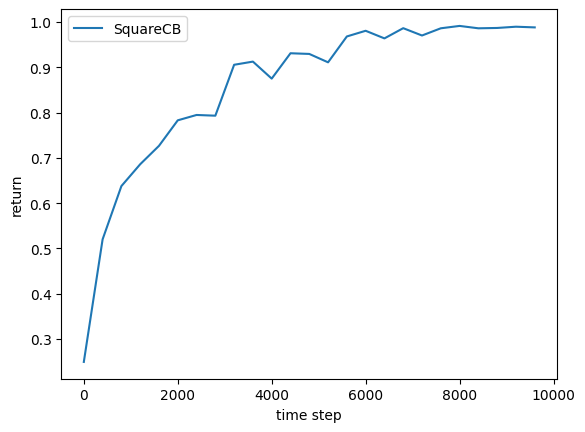

In [ ]:
# Create a Neural SquareCB pearl agent with 1-hot action representation

action_representation_module = OneHotActionTensorRepresentationModule(
    max_number_actions= env._action_space.n,
)

agent = PearlAgent(
    policy_learner=NeuralBandit(
        feature_dim = env.observation_dim + env._action_space.n,
        hidden_dims=[64, 16],
        training_rounds=50,
        action_representation_module=action_representation_module,
        exploration_module= SquareCBExploration(gamma = env.observation_dim * env._action_space.n * number_of_steps)
    ),
    replay_buffer=FIFOOffPolicyReplayBuffer(100_000),
    device_id=-1,
)


info = online_learning(
    agent=agent,
    env=env,
    number_of_steps=number_of_steps,
    print_every_x_steps=100,
    record_period=record_period,
    learn_after_episode=True,
)
torch.save(info["return"], "SquareCB-return.pt")
plt.plot(record_period * np.arange(len(info["return"])), info["return"], label="SquareCB")
plt.xlabel("time step")
plt.ylabel("return")
plt.legend()
plt.show()

episode 100, step 100, agent=PearlAgent with NeuralLinearBandit, FIFOOffPolicyReplayBuffer, env=Contextual bandits with CB datasets
return: -0.028449539095163345
episode 200, step 200, agent=PearlAgent with NeuralLinearBandit, FIFOOffPolicyReplayBuffer, env=Contextual bandits with CB datasets
return: 0.07872921228408813
episode 300, step 300, agent=PearlAgent with NeuralLinearBandit, FIFOOffPolicyReplayBuffer, env=Contextual bandits with CB datasets
return: 0.9911090135574341
episode 400, step 400, agent=PearlAgent with NeuralLinearBandit, FIFOOffPolicyReplayBuffer, env=Contextual bandits with CB datasets
return: 0.059778787195682526
episode 500, step 500, agent=PearlAgent with NeuralLinearBandit, FIFOOffPolicyReplayBuffer, env=Contextual bandits with CB datasets
return: -0.036440279334783554
episode 600, step 600, agent=PearlAgent with NeuralLinearBandit, FIFOOffPolicyReplayBuffer, env=Contextual bandits with CB datasets
return: -0.14758507907390594
episode 700, step 700, agent=PearlA

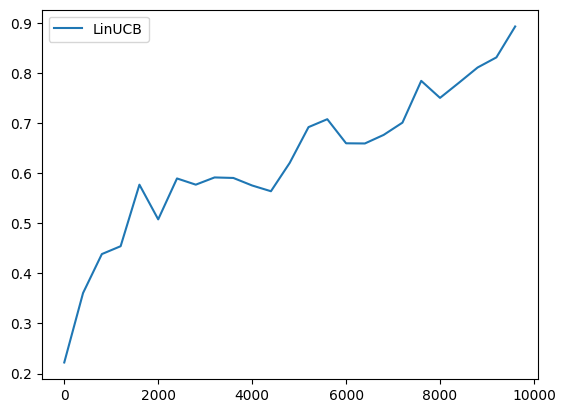

In [ ]:
# Create a Neural LinUCB pearl agent with 1-hot action representation

action_representation_module = OneHotActionTensorRepresentationModule(
    max_number_actions= env._action_space.n,
)

agent = PearlAgent(
    policy_learner=NeuralLinearBandit(
        feature_dim = env.observation_dim + env._action_space.n,
        hidden_dims=[64, 16],
        training_rounds=50,
        action_representation_module=action_representation_module,
        exploration_module= UCBExploration(alpha=1.0)
    ),
    replay_buffer=FIFOOffPolicyReplayBuffer(100_000),
    device_id=-1,
)


info = online_learning(
    agent=agent,
    env=env,
    number_of_steps=number_of_steps,
    print_every_x_steps=100,
    record_period=record_period,
    learn_after_episode=True,
)
torch.save(info["return"], "LinUCB-return.pt")
plt.plot(record_period * np.arange(len(info["return"])), info["return"], label="LinUCB")
plt.xlabel("time step")
plt.ylabel("return")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


episode 100, step 100, agent=PearlAgent with NeuralLinearBandit, FIFOOffPolicyReplayBuffer, env=Contextual bandits with CB datasets
return: -6.782996206311509e-05
episode 200, step 200, agent=PearlAgent with NeuralLinearBandit, FIFOOffPolicyReplayBuffer, env=Contextual bandits with CB datasets
return: 1.0620898008346558
episode 300, step 300, agent=PearlAgent with NeuralLinearBandit, FIFOOffPolicyReplayBuffer, env=Contextual bandits with CB datasets
return: 1.128913164138794
episode 400, step 400, agent=PearlAgent with NeuralLinearBandit, FIFOOffPolicyReplayBuffer, env=Contextual bandits with CB datasets
return: 1.0612578392028809
episode 500, step 500, agent=PearlAgent with NeuralLinearBandit, FIFOOffPolicyReplayBuffer, env=Contextual bandits with CB datasets
return: 1.01449716091156
episode 600, step 600, agent=PearlAgent with NeuralLinearBandit, FIFOOffPolicyReplayBuffer, env=Contextual bandits with CB datasets
return: -0.14748625457286835
episode 700, step 700, agent=PearlAgent wit

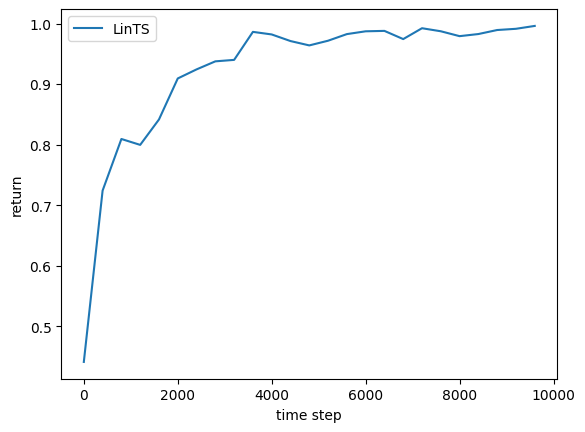

In [ ]:
# Create a Neural LinTS pearl agent with 1-hot action representation

action_representation_module = OneHotActionTensorRepresentationModule(
    max_number_actions= env._action_space.n,
)

agent = PearlAgent(
    policy_learner=NeuralLinearBandit(
        feature_dim = env.observation_dim + env._action_space.n,
        hidden_dims=[64, 16],
        training_rounds=50,
        action_representation_module=action_representation_module,
        exploration_module= ThompsonSamplingExplorationLinear()
    ),
    replay_buffer=FIFOOffPolicyReplayBuffer(100_000),
    device_id=-1,
)


info = online_learning(
    agent=agent,
    env=env,
    number_of_steps=number_of_steps,
    print_every_x_steps=100,
    record_period=record_period,
    learn_after_episode=True,
)
torch.save(info["return"], "LinTS-return.pt")
plt.plot(record_period * np.arange(len(info["return"])), info["return"], label="LinTS")
plt.xlabel("time step")
plt.ylabel("return")
plt.legend()
plt.show()